In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [25]:
df = pd.read_csv('Netflix Userbase.csv')
df = pd.DataFrame(df)
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

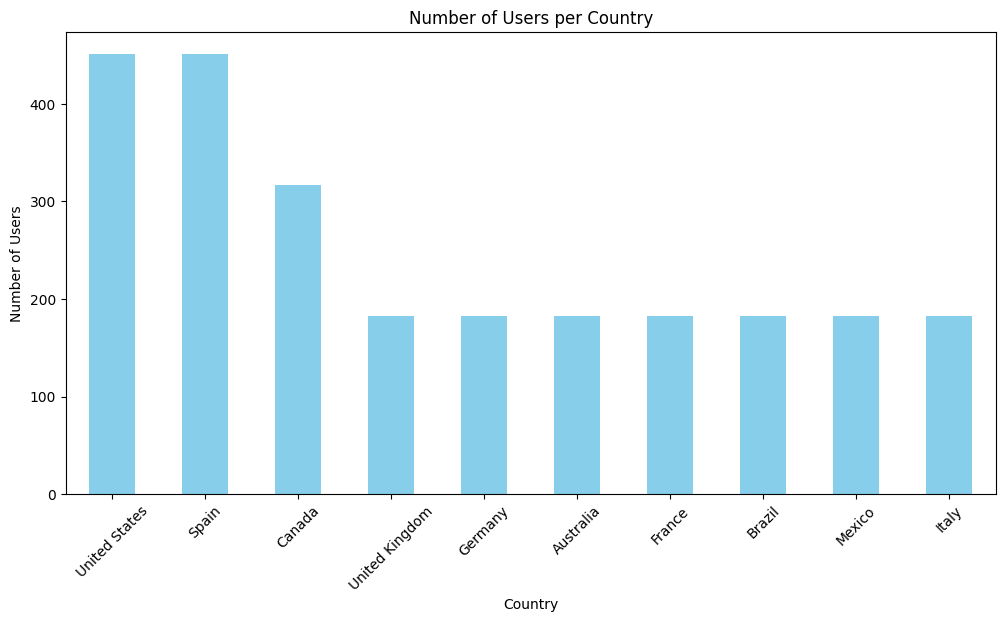

In [29]:
plt.figure(figsize=(12,6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')  # Correct the plot kind and check the column name
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Number of Users per Country')
plt.xticks(rotation=45)
plt.show()



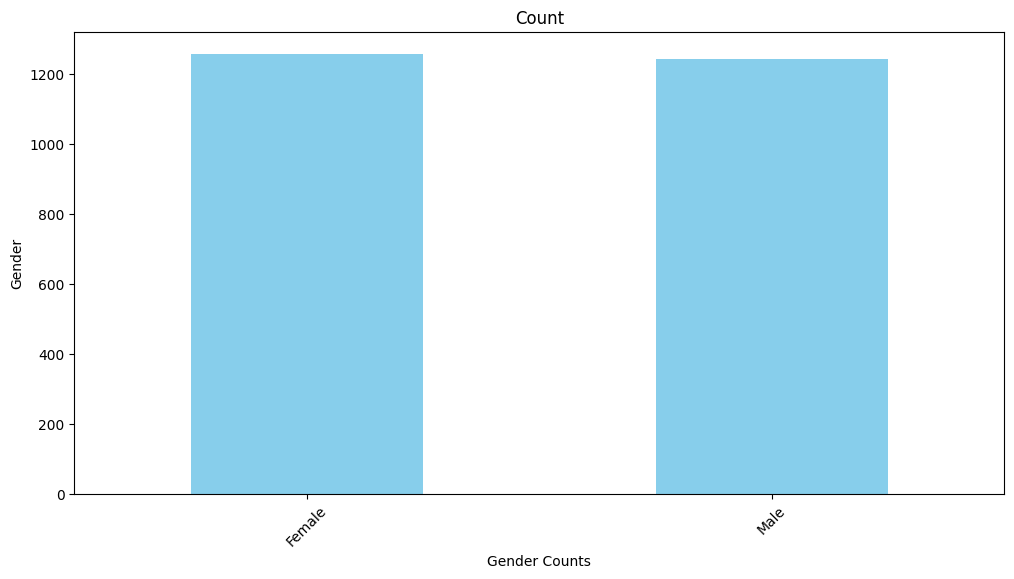

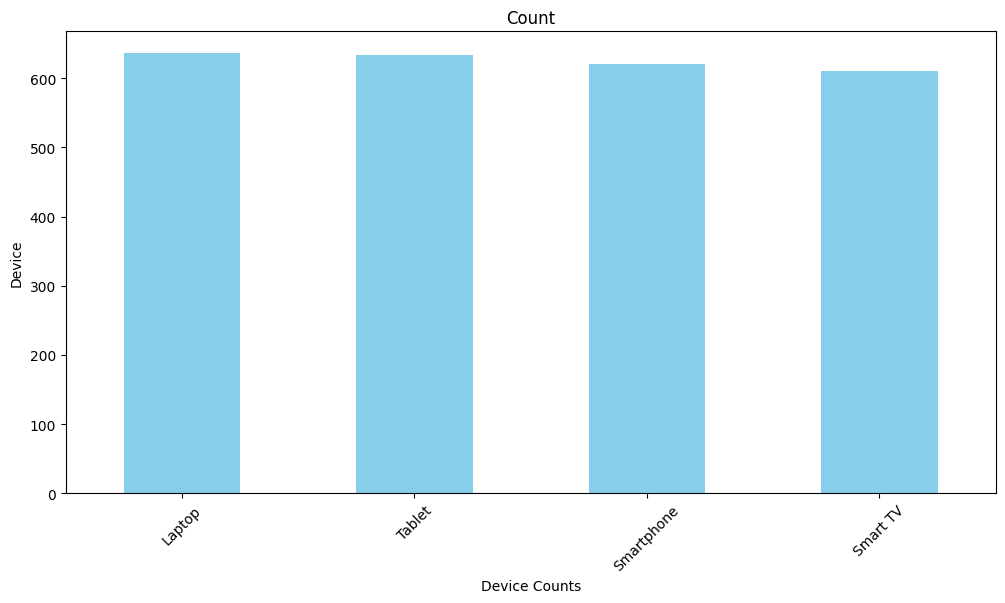

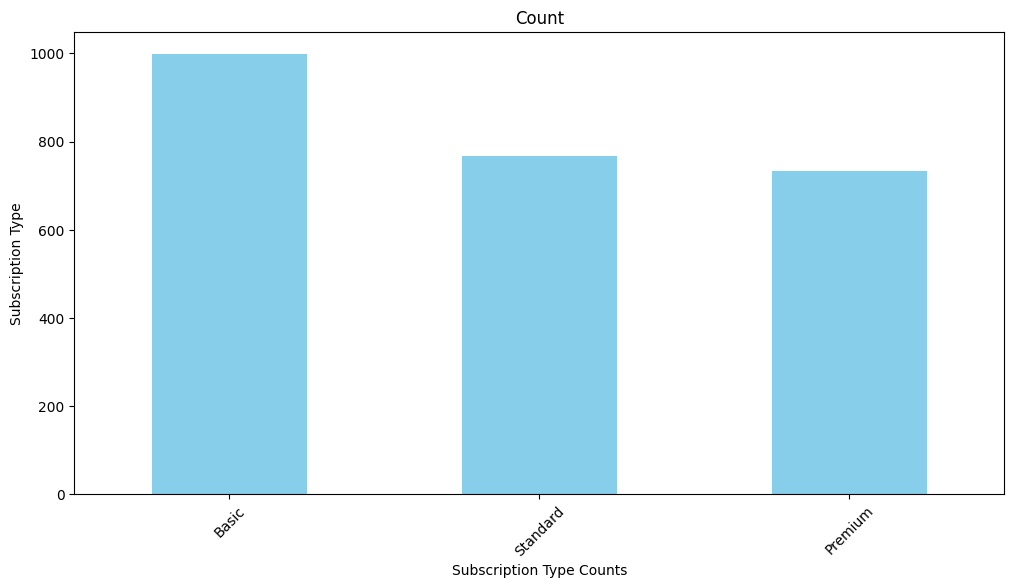

In [30]:
columns_titles = {
    'Gender': 'Gender Counts',
    'Device': 'Device Counts',
    'Subscription Type': 'Subscription Type Counts'
}

for column, title in columns_titles.items():
    plt.figure(figsize=(12,6))
    df[column].value_counts().plot(kind='bar', color='skyblue')  # Correct the plot kind and check the column name
    plt.xlabel(title)
    plt.ylabel(column)
    plt.title('Count')
    plt.xticks(rotation=45)
    plt.show()
    
    

In [31]:
user_counts_by_country = df['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country', 'User Column']

import plotly.express as px

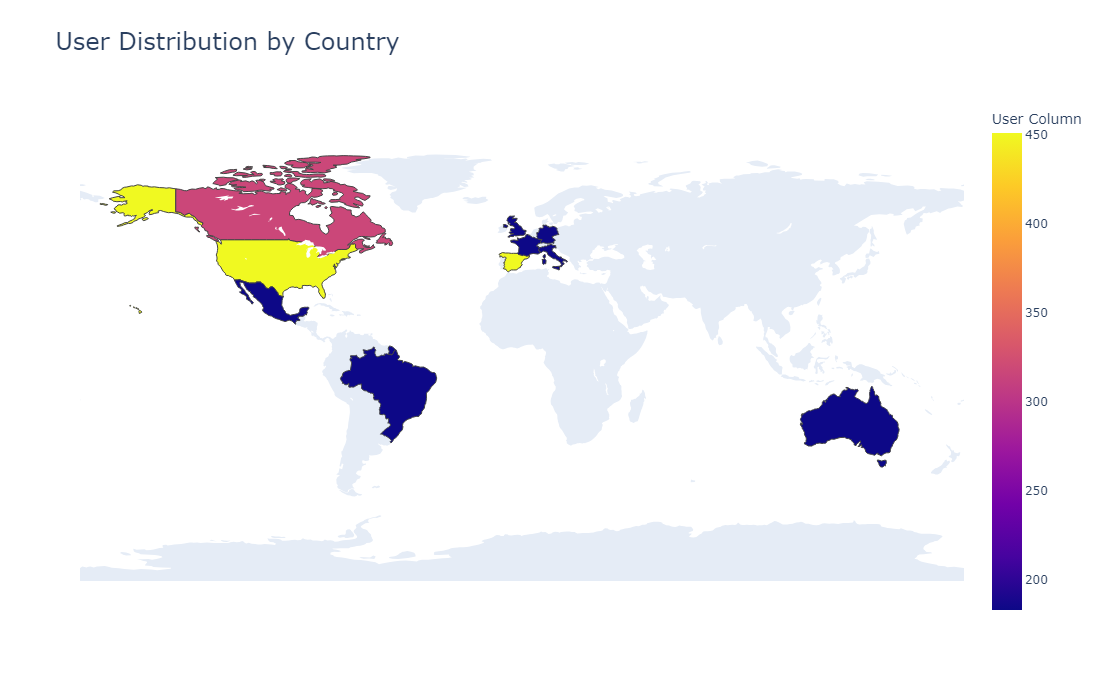

In [32]:
fig = px.choropleth(user_counts_by_country, 
                    locations='Country', 
                    locationmode='country names', 
                    color='User Column',  # Updated here
                    hover_name='Country',  
                    title='User Distribution by Country',
                    color_continuous_scale=px.colors.sequential.Plasma
                   )

fig.update_layout(
    width=1000,
    height=700,
    title_font_size=24,
    geo=dict(
         showframe=False,
         showcoastlines=False   
    )
)

fig.show()

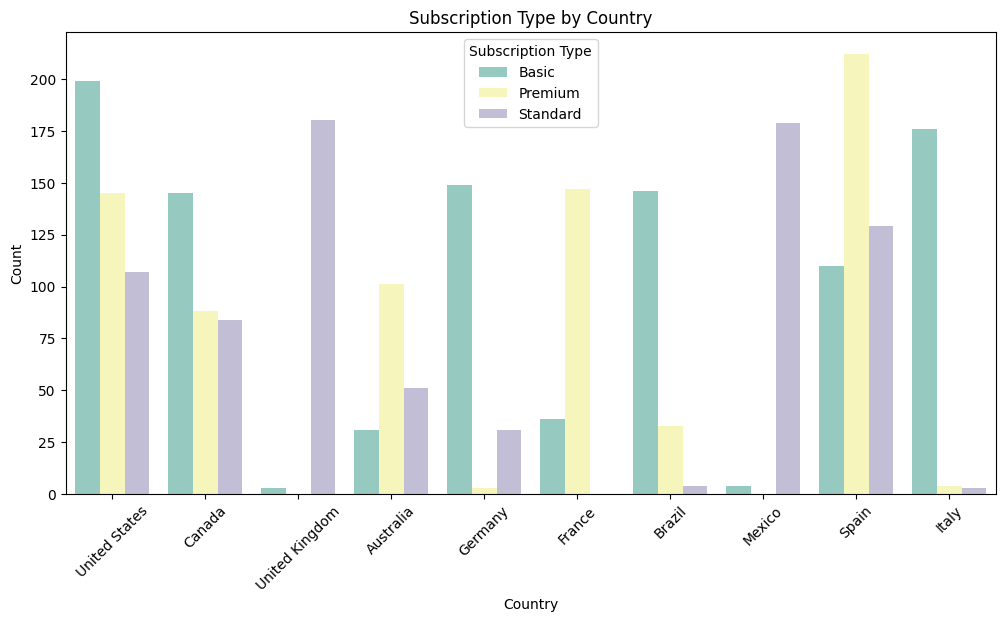

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='Subscription Type', data=df, palette='Set3')
plt.title('Subscription Type by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [48]:
subs_by_country = df.pivot_table(
    index='Country',
    columns='Subscription Type',
    values='User ID',
    aggfunc='count',
    fill_value=0
)

In [49]:
subs_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [55]:
subs_by_country['Total'] = subs_by_country.sum(axis=1)

In [56]:
subs_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,366.0
Brazil,146,33,4,366.0
Canada,145,88,84,634.0
France,36,147,0,366.0
Germany,149,3,31,366.0
Italy,176,4,3,366.0
Mexico,4,0,179,366.0
Spain,110,212,129,902.0
United Kingdom,3,0,180,366.0


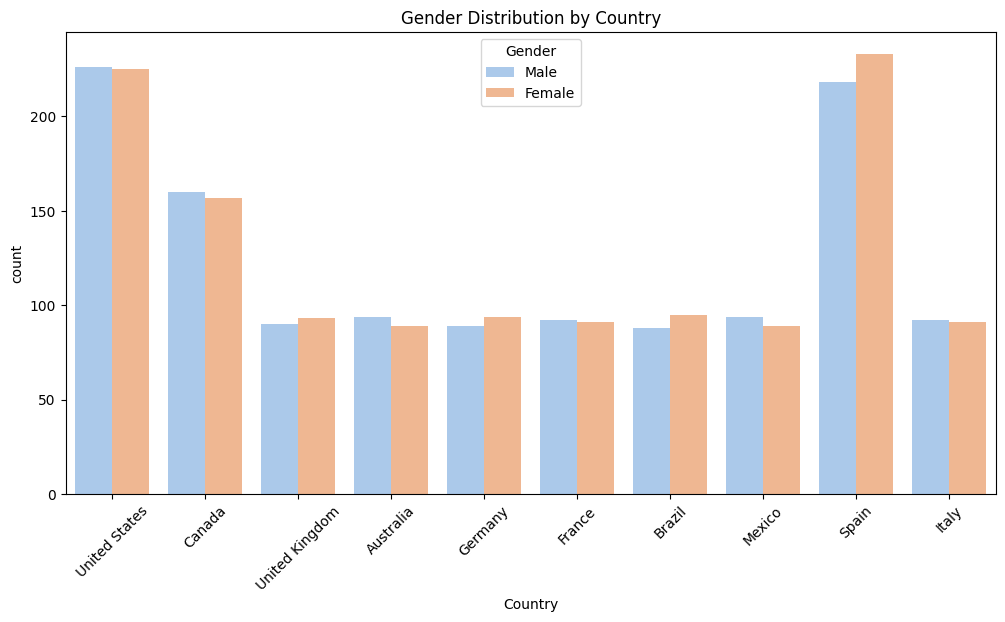

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel')
plt.title('Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [59]:
gender_by_country=df.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)
gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [63]:
subs_by_country_gender = df.pivot_table(index='Country',
                                       columns=['Subscription Type','Gender'],
                                       values='User ID', aggfunc='count', fill_value=0)
subs_by_country_gender

Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

In [64]:
subs_by_country_gender2 = df.pivot_table(
    index=['Country','Gender'], columns='Subscription Type', values='User ID', aggfunc='count', fill_value=0
)

subs_by_country_gender2

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57